In [1]:
import taunet_utils
from os.path import join
import pandas as pd
import seaborn as sns
import json
from augmolino import augmentation, augmenter

In [2]:
input_data, output_data = taunet_utils.create_dataset(join("dataset", "audio"), 
                                                      join("dataset", "human_input", "AITD_Dataset_Kristof_beta_1.csv"),
                                                      join("..", "src", "af", "AFInC.dll"),
                                                      join("dataset", "saved", "AITD_Dataset_Kristof_beta_1.json"))

with open(join("dataset", "saved", "AITD_Dataset_Kristof_beta_1in.json"), "r") as json_file:
    input_data = json.load(json_file)
with open(join("dataset", "saved", "AITD_Dataset_Kristof_beta_1out.json"), "r") as json_file:
    output_data = json.load(json_file)

data = dict()
for key in input_data.keys():
    data[key] = input_data[key] + output_data[key]
print(data)
df = pd.DataFrame.from_dict(data).T
# df.index = df.index.astype(int)
df = df.sort_index()
df.columns = ["TEMPO",
              "T1A", 
              "T2A", 
              "CENTROID", 
              "FLATNESS", 
              "L", 
              "ML", 
              "MH", 
              "H", 
              "CREST",
              "FLUX",
              "ATTACK_GAIN",
              "SUSTAIN_GAIN",
              "ATTACK_T1",
              "SUSTAIN_T1"]
df.head()


{'1 4397-spicy-drums': [0.7748, 0.012, 0.2251, 0.1621, 0.1335, 0.4836, 0.5895, 0.1336, 0.0194, 0.1007, 0.0475, 0.6738, 0.8758, 0.7210246, 0.3815809], '1 h_shift_96000_-1': [0.7748, 0.0262, 0.2208, 0.0786, 0.1709, 0.3627, 0.4122, 0.114, 0.0261, 0.1534, 0.0284, 0.6738, 0.8758, 0.7210246, 0.3815809], '1 ch_shift_96000_1': [0.7748, 0.026, 0.2163, 0.0884, 0.2598, 0.2331, 0.286, 0.0802, 0.0215, 0.1594, 0.0343, 0.6738, 0.8758, 0.7210246, 0.3815809], '1 s_time_fade_1_in': [0.7748, 0.014, 0.2246, 0.1826, 0.2913, 0.4839, 0.5903, 0.1342, 0.0194, 0.0983, 0.0, 0.6738, 0.8758, 0.7210246, 0.3815809], '1 _time_fade_1_out': [0.7769, 0.014, 0.2276, 0.0918, 0.0815, 0.5813, 0.6499, 0.2184, 0.0448, 0.0998, 0.0368, 0.6738, 0.8758, 0.7210246, 0.3815809], '1 time_offset_-0_5': [0.7748, 0.014, 0.2246, 0.1827, 0.3236, 0.5296, 0.5921, 0.1342, 0.0194, 0.0998, 0.1073, 0.6738, 0.8758, 0.7210246, 0.3815809], '1 time_offset_-1_0': [0.7748, 0.014, 0.2246, 0.1545, 0.2215, 0.5299, 0.6201, 0.1342, 0.0111, 0.0977, 0.0003,

,TEMPO,T1A,T2A,CENTROID,FLATNESS,L,ML,MH,H,CREST,FLUX,ATTACK_GAIN,SUSTAIN_GAIN,ATTACK_T1,SUSTAIN_T1
1 4397-spicy-drums,0.7748,0.012,0.2251,0.1621,0.1335,0.4836,0.5895,0.1336,0.0194,0.1007,0.0475,0.6738,0.8758,0.721025,0.381581
1 _time_fade_1_out,0.7769,0.014,0.2276,0.0918,0.0815,0.5813,0.6499,0.2184,0.0448,0.0998,0.0368,0.6738,0.8758,0.721025,0.381581
1 _time_offset_0_0,0.7748,0.014,0.2276,0.0918,0.0972,0.5299,0.6201,0.1984,0.0408,0.0977,0.0368,0.6738,0.8758,0.721025,0.381581
1 _time_offset_0_5,0.7748,0.014,0.2276,0.0918,0.0972,0.5299,0.6201,0.1984,0.0408,0.0977,0.0000,0.6738,0.8758,0.721025,0.381581
1 _time_offset_1_0,0.7748,0.014,0.2276,0.0918,0.0972,0.5299,0.6201,0.1984,0.0408,0.0977,0.0000,0.6738,0.8758,0.721025,0.381581


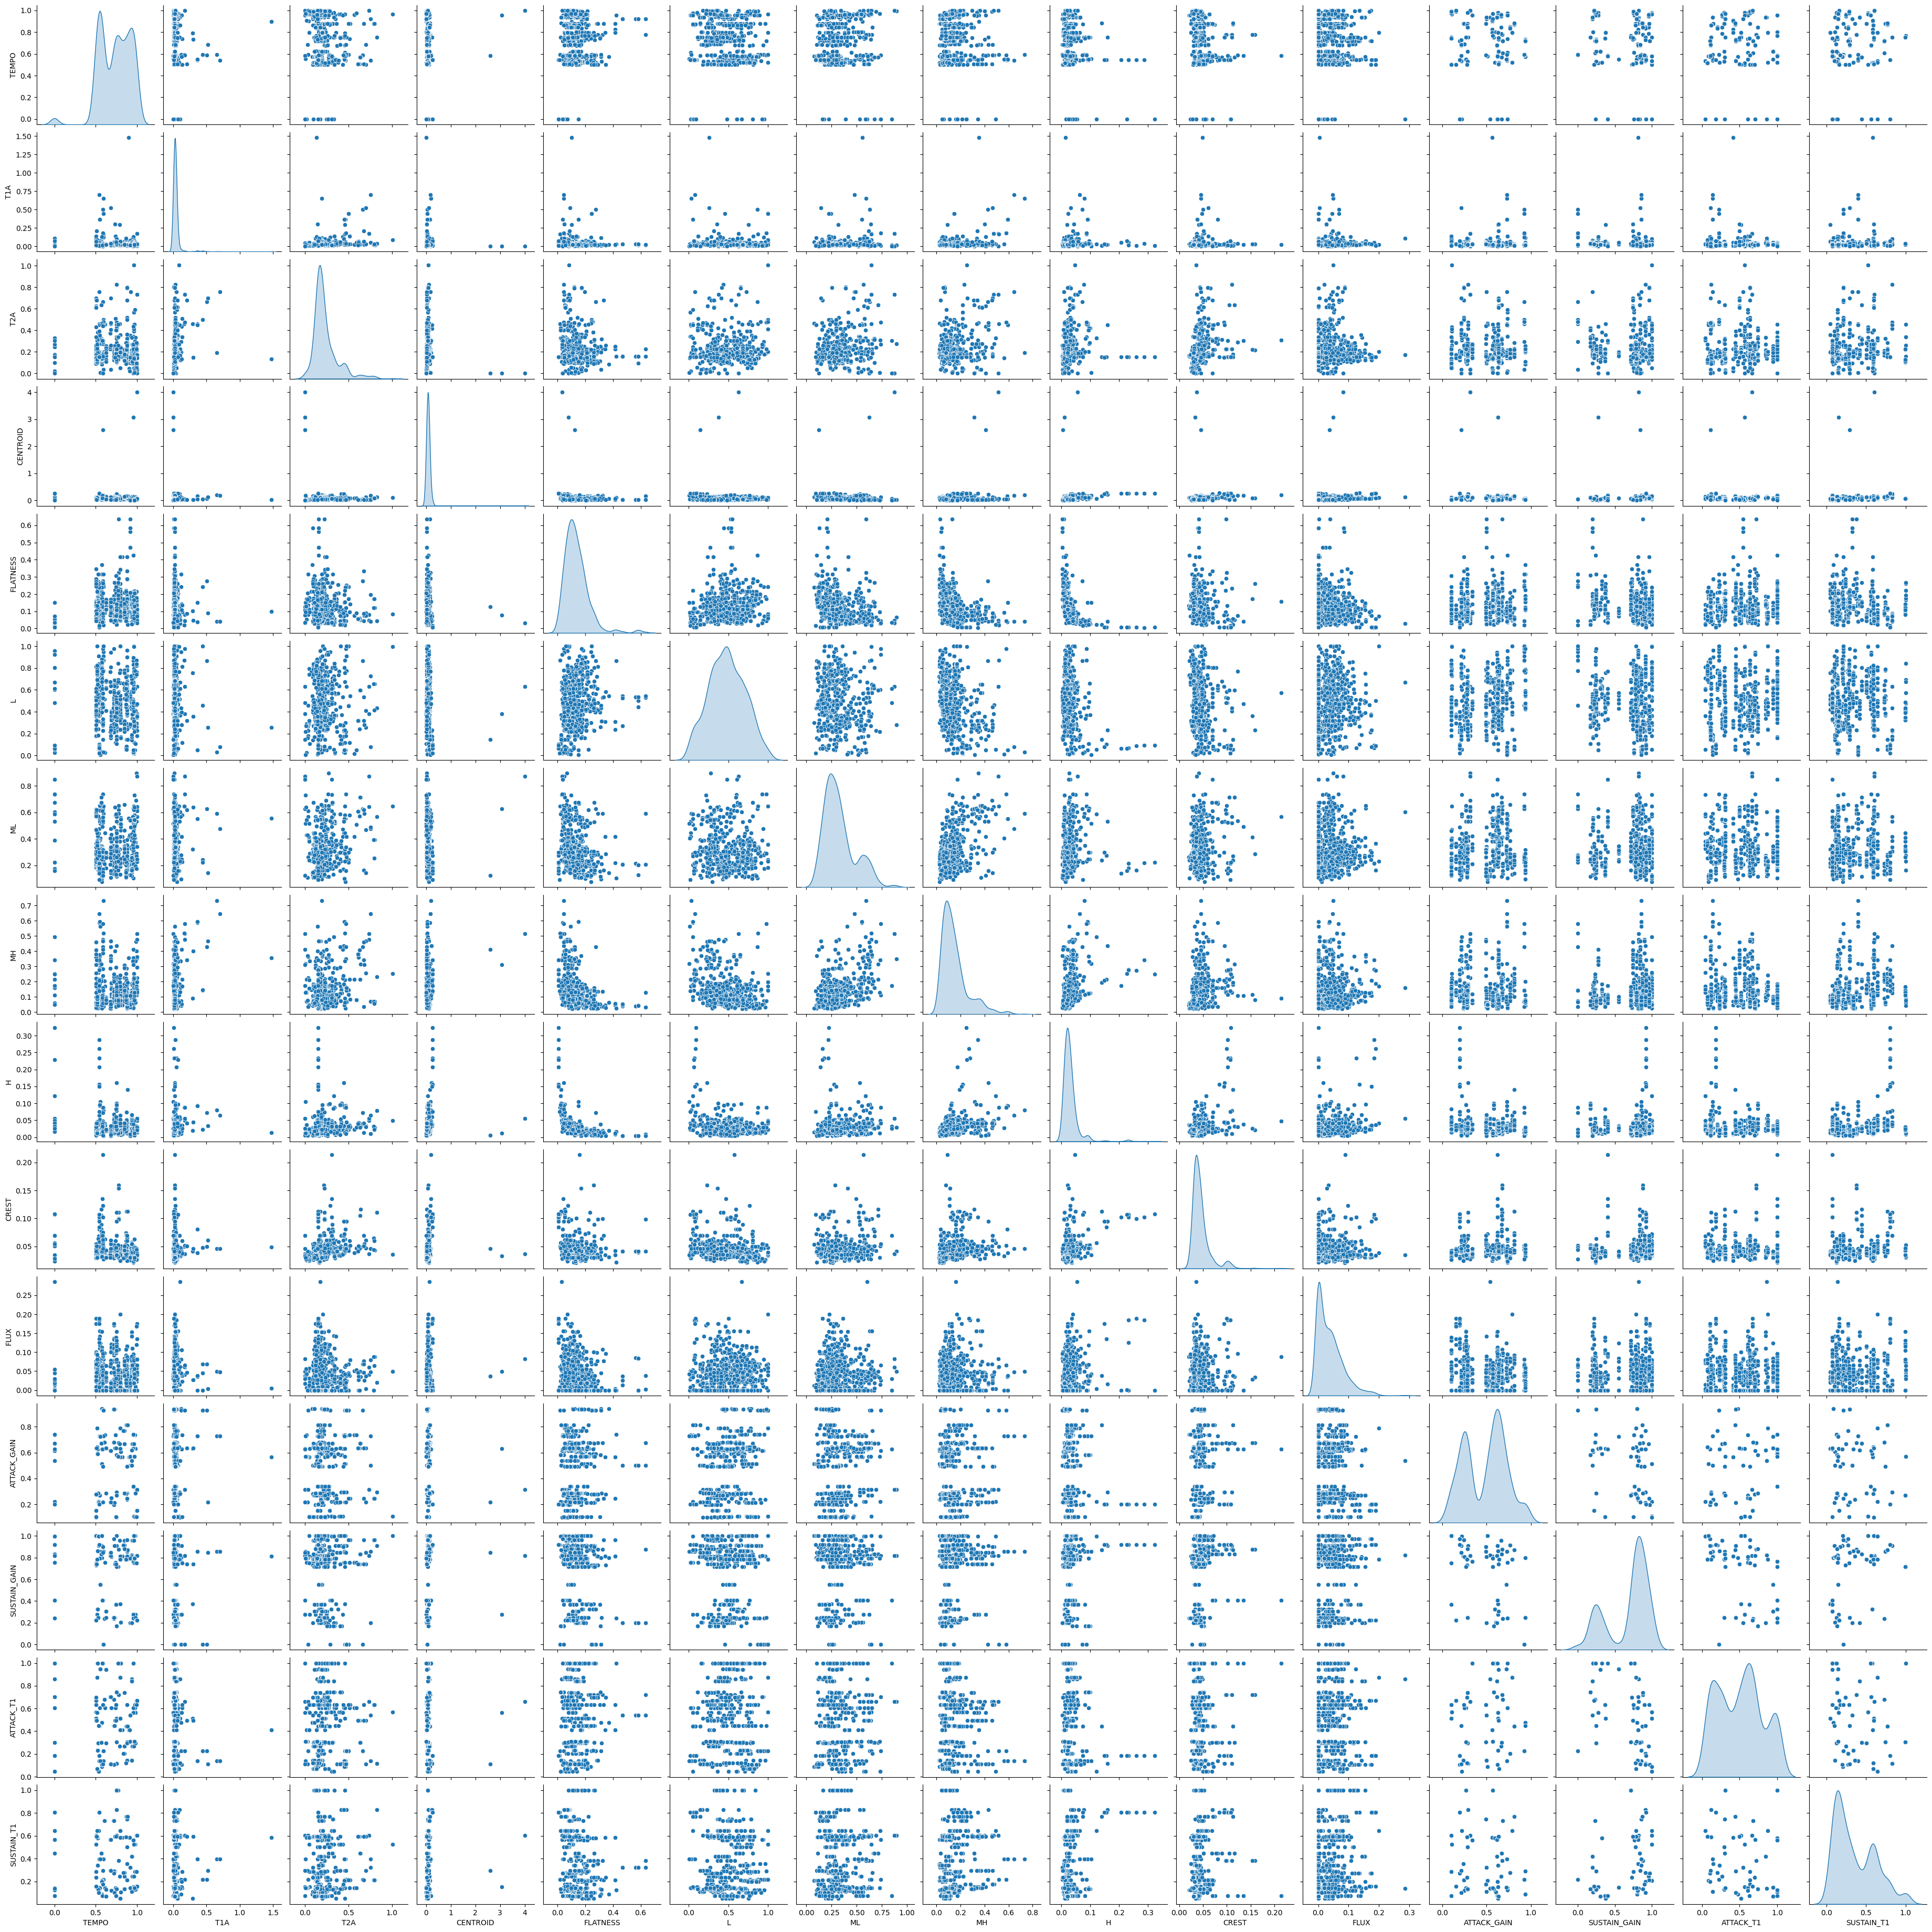

In [3]:

sns.pairplot(data=df, diag_kind='kde')

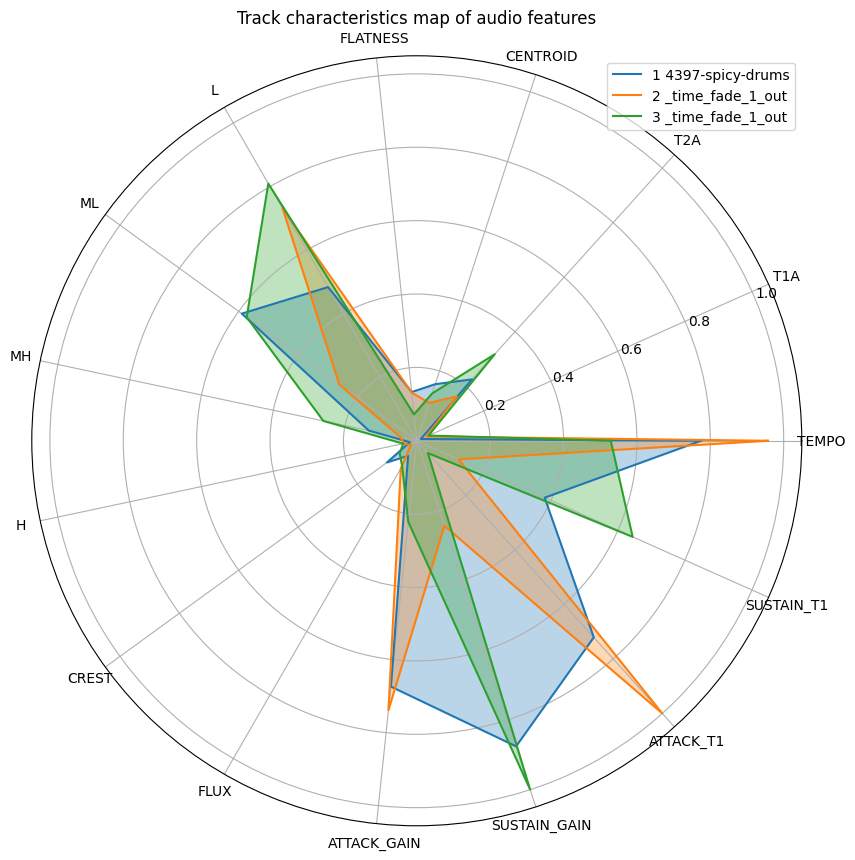

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume you already have a DataFrame called df with the desired structure and data

# Select unique index numbers
unique_numbers = df.index.str[0].unique()[:3]  # Select first 3 unique index numbers

# Create polar subplot
fig, ax = plt.subplots(subplot_kw=dict(polar=True), figsize=(10,10))

# Plot each subset separately
for num in unique_numbers:
    subset_df = df[df.index.str.startswith(str(num))]
    label = subset_df.index[0]
    categories = subset_df.columns.tolist()
    data = subset_df.values[0]  # Selecting the first row of the subset for plotting
    
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    data = np.concatenate((data, [data[0]]))
    angles += angles[:1]

    ax.plot(angles, data, label=label)
    ax.fill(angles, data, alpha=0.3)  # Fill the inner part with semi-transparent color

# Set tick labels to DataFrame index
ax.set_xticks(angles[:-1])
ax.set_xticklabels(df.columns.tolist())

plt.legend()
plt.title('Track characteristics map of audio features')
plt.show()


In [4]:
augmentations = []
offsets = np.arange(-2, 2, 0.5)
for offset in offsets:
    augmentations.append(augmentation.offsetAudio(offset, sample_rate=96000))

augmentations.append(augmentation.pitchShift(1, sample_rate=96000))
augmentations.append(augmentation.pitchShift(-1, sample_rate=96000))
augmentations.append(augmentation.fadeAudio(1, "in", sample_rate=96000))
augmentations.append(augmentation.fadeAudio(1, "out", sample_rate=96000))

augs_offs = augmenter.augmenter(augmentations)
augs_offs.summary()

NameError: name 'np' is not defined

In [ ]:
augs_offs.execute(join("dataset", "audio"), "auto")